# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
print(api_key)

22340e782dda4cb9a30800ab80c06360


In [4]:
# Create a newsapi client
from newsapi import NewsApiClient

newsapi = NewsApiClient(api_key=api_key)

In [5]:
# Fetch the Bitcoin news articles

bitcoin_news = newsapi.get_everything(
    q="bitcoin",
    language = "en",
    page_size = 100,
    sort_by = "relevancy")


In [6]:
# Fetch the Ethereum news articles

ethereum_news = newsapi.get_everything(
    q="ethereum",
    language = "en",
    page_size = 100,
    sort_by = "relevancy")


In [8]:
# Create the Bitcoin sentiment scores DataFrame

sentiments = []

for article in bitcoin_news["articles"]:
    try:
        text = article["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment ["pos"]
        neu = sentiment ["neu"]
        neg = sentiment["neg"]
        
        sentiments.append({
            "text" : text,
            "Compound" : compound,
            "Positive" : pos,
            "Negative" : neg,
            "Neutral" : neu
        })
    except AttributeError:
        pass
    
#Create DataFrame

bitcoin_df = pd.DataFrame(sentiments)

#Reordering the column order

#cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
#bitcoin_df = bitcoin_df[cols]

bitcoin_df.head()

,text,Compound,Positive,Negative,Neutral
0,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919
1,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
2,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943
3,The wallet will have USB-C and a fingerprint r...,-0.4404,0.000,0.088,0.912
4,German authorities have seized $25.2 million U...,0.0000,0.000,0.000,1.000


In [12]:
# Create the Ethereum sentiment scores DataFrame
sentiments =[]

for articles in ethereum_news["articles"]:
    try:
        text = articles["content"]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment ["neu"]
        neg = sentiment ["neg"]
        
        sentiments.append({
            "text" : text,
            "Compound" : compound,
            "Positive" : pos,
            "Negative" : neg,
            "Neutral" : neu
        })
    except AttributeError:
        pass
#Create DataFrame

ethereum_df = pd.DataFrame(sentiments)

#Reordering the column order

#cols = ["Compound", "Negative", "Neutral", "Positive", "text"]
#ethereum_df = ethereum_df[cols]

ethereum_df.head()

,text,Compound,Positive,Negative,Neutral
0,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898
1,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
2,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
3,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851
4,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812


In [13]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.183480,0.069880,0.027730,0.902400
std,0.349712,0.064622,0.041492,0.075325
min,-0.709600,0.000000,0.000000,0.693000
25%,0.000000,0.000000,0.000000,0.852000
50%,0.152950,0.072500,0.000000,0.912000
75%,0.462950,0.113250,0.065500,0.950500
max,0.865500,0.263000,0.162000,1.000000


In [14]:
# Describe the Ethereum Sentiment
ethereum_df.describe()

,Compound,Positive,Negative,Neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.209433,0.091110,0.037250,0.871620
std,0.405902,0.081044,0.051962,0.090757
min,-0.784500,0.000000,0.000000,0.594000
25%,0.000000,0.000000,0.000000,0.805500
50%,0.232250,0.078500,0.000000,0.885000
75%,0.528675,0.138000,0.068750,0.934000
max,0.932700,0.349000,0.233000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had a little higher mean positive score

Q: Which coin had the highest compound score?

A: Bitcoin had the highest compound score

Q. Which coin had the highest positive score?

A: Bitcoin had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [15]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [16]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/dariamerkulenko/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = stopwords.words('english')


In [21]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Create a tokenized list of the words
    
    words = word_tokenize(text)
    
    # Remove the punctuation
    words = list(filter(lambda t: t not in punctuation, words))
    
    # Lemmatize words into root words
    
    tokens = [lemmatizer.lemmatize(word) for word in words]
   
    # Convert the words to lowercase
    
    words = list(filter(lambda w: w.lower(), words))
    
    # Remove the stop words
    
    words = list(filter(lambda t: t.lower() not in sw, words))
    
    return tokens

In [23]:
# Create a new tokens column for Bitcoin

bitcoin_df["Tokens"] = bitcoin_df.text.apply(tokenizer)
bitcoin_df.head()

,text,Compound,Positive,Negative,Neutral,Tokens
0,Its set to open later this year\r\nIf you buy ...,-0.4404,0.000,0.081,0.919,"[Its, set, to, open, later, this, year, If, yo..."
1,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[Wikipedia, editor, have, voted, in, favor, of..."
2,"You might have heard of crypto Twitter, the co...",-0.2732,0.000,0.057,0.943,"[You, might, have, heard, of, crypto, Twitter,..."
3,The wallet will have USB-C and a fingerprint r...,-0.4404,0.000,0.088,0.912,"[The, wallet, will, have, USB-C, and, a, finge..."
4,German authorities have seized $25.2 million U...,0.0000,0.000,0.000,1.000,"[German, authority, have, seized, 25.2, millio..."


In [24]:
# Create a new tokens column for Ethereum
ethereum_df["Tokens"] = ethereum_df.text.apply(tokenizer)
ethereum_df.head()

,text,Compound,Positive,Negative,Neutral,Tokens
0,Digital thieves just pulled off another major ...,-0.5106,0.000,0.102,0.898,"[Digital, thief, just, pulled, off, another, m..."
1,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[The, US, Department, of, Treasury, say, Lazar..."
2,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[18, with, 15, poster, participating, includin..."
3,"This week, the cryptocurrency network Ronin di...",-0.4215,0.051,0.098,0.851,"[This, week, the, cryptocurrency, network, Ron..."
4,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[Opera, launched, it, dedicated, ``, Crypto, B..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [25]:
from collections import Counter
from nltk import ngrams

In [26]:
# Generate the Bitcoin N-grams where N=2
N=2

btc_grams = ngrams(tokenizer(bitcoin_df.text.str.cat()),N)

Counter(btc_grams).most_common(20)


[(('in', 'the'), 19),
 (('of', 'the'), 16),
 (('the', 'world'), 15),
 (('char', 'The'), 8),
 (('the', 'Bitcoin'), 7),
 (('to', 'the'), 7),
 (('char', 'April'), 7),
 (('world', "'s"), 7),
 (('char', 'LONDON'), 7),
 (('NFTs', 'and'), 6),
 (('is', 'the'), 6),
 (('this', 'year'), 5),
 (('for', 'the'), 5),
 (('Bitcoin', 'is'), 5),
 (('bitcoin', 'a'), 5),
 (('on', 'Thursday'), 5),
 (('at', 'the'), 5),
 (('one', 'of'), 5),
 (('this', 'week'), 5),
 (('the', 'latest'), 5)]

In [27]:
# Generate the Ethereum N-grams where N=2
N = 2
eth_grams = ngrams(tokenizer(ethereum_df.text.str.cat()), N)
Counter(eth_grams).most_common(20)

[(('of', 'the'), 18),
 (('the', 'world'), 12),
 (('char', 'The'), 10),
 (('Ethereum', 'ETH'), 10),
 (('Axie', 'Infinity'), 9),
 (('one', 'of'), 9),
 (('in', 'the'), 9),
 (('to', 'the'), 8),
 (('char', 'April'), 7),
 (('on', 'the'), 7),
 (('North', 'Korean'), 6),
 (('this', 'week'), 6),
 (('is', 'a'), 6),
 (('world', "'s"), 6),
 (('from', 'the'), 5),
 (('the', 'most'), 5),
 (('year', 'and'), 5),
 (('with', 'the'), 5),
 (('ha', 'been'), 5),
 (('million', 'in'), 4)]

In [28]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [31]:
# Use token_count to get the top 10 words for Bitcoin
world_tokens = tokenizer(bitcoin_df.text.str.cat())
token_count(world_tokens, 10)

[('the', 152),
 ('a', 101),
 ('char', 95),
 ('to', 88),
 ('of', 78),
 ('and', 60),
 ('in', 59),
 ('on', 40),
 ("'s", 36),
 ('is', 35)]

In [32]:
# Use token_count to get the top 10 words for Ethereum
world_tokens = tokenizer(ethereum_df.text.str.cat())
token_count(world_tokens, 10)

[('the', 134),
 ('char', 100),
 ('a', 80),
 ('to', 75),
 ('and', 70),
 ('of', 68),
 ('in', 59),
 ('is', 41),
 ('The', 36),
 ('on', 35)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [34]:
def wordcloud(text, title=""):
    df_cloud = WordCloud(width=500, colormap='RdYlBu').generate(text)
    plt.imshow(df_cloud)
    plt.axis("off")
    fontdict = {"fontsize": 48, "fontweight" : "bold"}
    plt.title(title, fontdict=fontdict)
    plt.show()

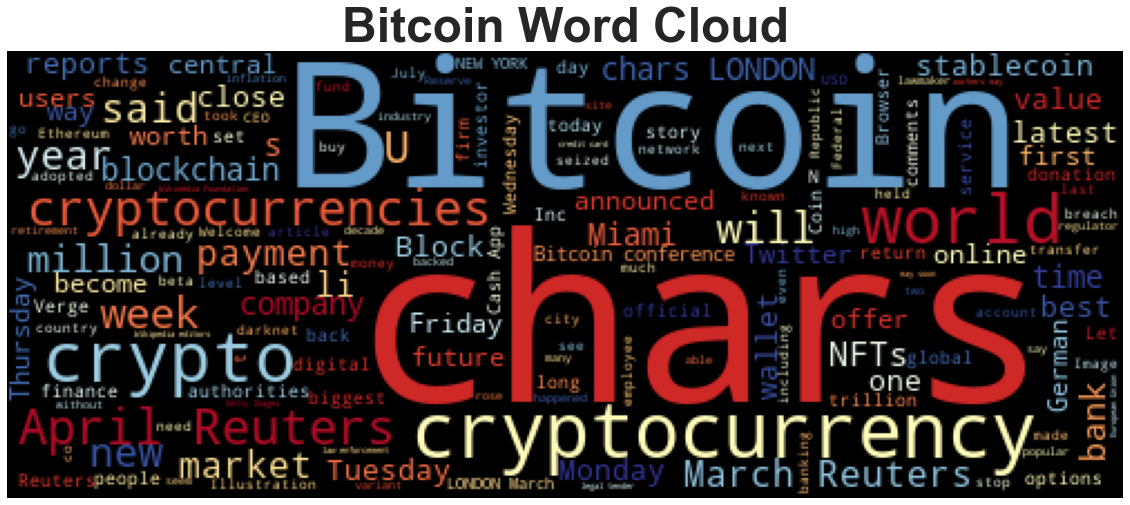

In [35]:
# Generate the Bitcoin word cloud
wordcloud(bitcoin_df.text.str.cat(), title="Bitcoin Word Cloud")

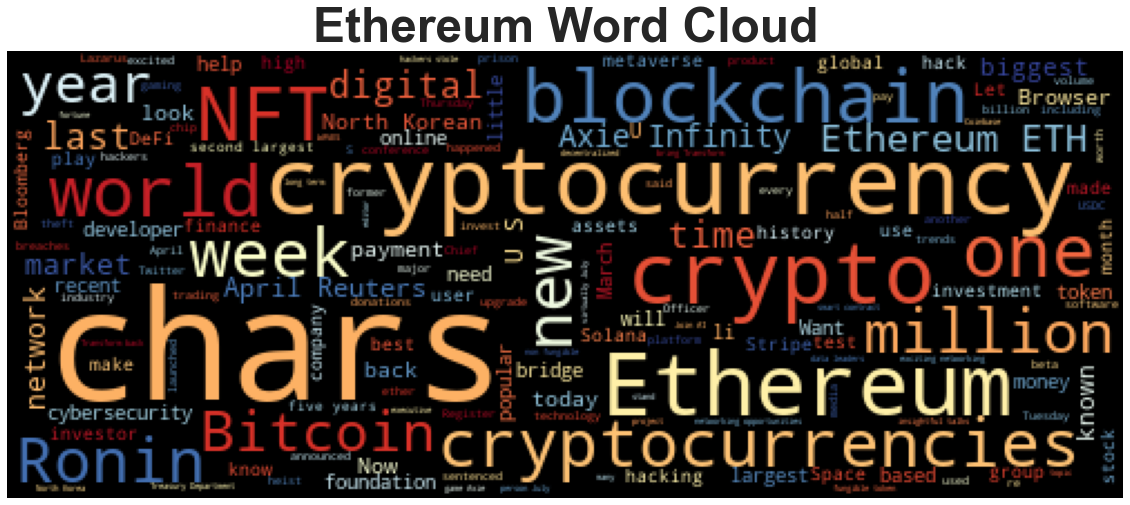

In [36]:
# Generate the Ethereum word cloud
wordcloud(ethereum_df.text.str.cat(), title="Ethereum Word Cloud")

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [37]:
import spacy
from spacy import displacy

In [38]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [39]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [41]:
# Concatenate all of the Bitcoin text together
all_btc_text = bitcoin_df.text.str.cat()
all_btc_text

'Its set to open later this year\r\nIf you buy something from a Verge link, Vox Media may earn a commission. See our ethics statement.\r\nIllustration by Alex Castro / The Verge\r\nBlock and Blockstream, a … [+1336 chars]Wikipedia editors have voted in favor of dropping cryptocurrency from the Wikimedia Foundation\'s donation options. As Ars Technica reports, an editor for the online encyclopedia called GorillaWarfare… [+1577 chars]You might have heard of crypto Twitter, the corner of the social network where accounts have Bored Apes as profile pictures, posts are rife with talk of tokens, blockchains, and buying the Bitcoin di… [+3133 chars]The wallet will have USB-C and a fingerprint reader. | Image: @JesseDorogusker on Twitter\r\n\n \n\n We may have just seen the Bitcoin hardware wallet that Jack Dorsey’s Block (the company formerly known … [+1777 chars]German authorities have seized $25.2 million USD in Bitcoin\r\nGerman authorities shut down the server infrastructure for the Russi

In [42]:
# Run the NER processor on all of the text
btc_ner = nlp(all_btc_text)

# Add a title to the document
btc_ner.user_data["title"] = "Bitcoin NER"

In [44]:
# Render the visualization
displacy.render(btc_ner, style='ent', jupyter=True)

In [45]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

later this year DATE
Verge LAW
Vox Media ORG
Alex Castro PERSON
Verge ORG
the Wikimedia Foundation's ORG
Ars Technica PERSON
GorillaWarfare ORG
Twitter PRODUCT
Bored Apes PERSON
Bitcoin PERSON
USB-C ORG
Twitter PRODUCT
Jack Dorsey’s PERSON
$25.2 million MONEY
Bitcoin GPE
German NORP
Russian NORP
Hydra GPE
23 million CARDINAL
Friday DATE
Axios PERSON
19 million CARDINAL
Reuters ORG
$10 billion MONEY
BEACH GPE
April 7 DATE
Reuters ORG
Samson Mow PERSON
Thursday DATE
Jan3 ORG
Jack Dorsey PERSON
three CARDINAL
Cash App PERSON
Bitcoin 2022 DATE
Thursday DATE
CoinDesk ORG
Intelligence ORG
Cash App PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
27 CARDINAL
Reuters ORG
4.41% PERCENT
46,499.29 MONEY
Sunday DATE
1,963.64 MONEY
Bitcoin PERSON
41.1% PERCENT
Reuters ORG
5.1% PERCENT
38,391.36 MONEY
Tuesday DATE
2,229.82 MONEY
Bitcoin PERSON
16% PERCENT
year DATE
+339 ORG
AMC ORG
April 15 DATE
AMC ORG
Adam Aron 

---

### Ethereum NER

In [47]:
# Concatenate all of the bitcoin text together
all_eth_text = ethereum_df.text.str.cat()
all_eth_text

'Digital thieves just pulled off another major crypto heist. Motherboard has learned hackers stole 173,600 Ethereum (about $591.2 million) from the Ronin blockchain that powers Axie Infinity, a popula… [+1462 chars]The US Department of Treasury says Lazarus is behind the attack\r\nThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars]18 with 15 posters participating, including story author\r\nMore than 200 long-time Wikipedia editors have requested that the Wikimedia Foundation stop accepting cryptocurrency donations.\xa0The foundatio… [+4016 chars]This week, the cryptocurrency network Ronin disclosed a breach in which attackers made off with $540 million worth of Ethereum and USDC stablecoin. The incident, which is one of the biggest heists in… [+3084 chars]Opera launched its dedicated "Crypto Browser" into beta back in January, promising to make Web3 as accessible as any Web2 website. The c

In [48]:
# Run the NER processor on all of the text
eth_ner = nlp(all_eth_text)

# Add a title to the document
eth_ner.user_data["title"] = "Ethereum NER"

In [49]:
# Render the visualization
displacy.render(eth_ner, style='ent', jupyter=True)

In [51]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

Digital ORG
Motherboard PERSON
173,600 CARDINAL
Ethereum ORG
about $591.2 million MONEY
Ronin ORG
Axie Infinity GPE
US Department ORG
Treasury ORG
Lazarus PERSON
The US Treasury Department ORG
North Korean NORP
Lazarus ORG
$625 million MONEY
Ronin PERSON
15 CARDINAL
More than 200 CARDINAL
Wikipedia ORG
the Wikimedia Foundation ORG
Ronin ORG
$540 million MONEY
Ethereum GPE
USDC ORG
Crypto Browser PERSON
January DATE
Windows, Mac ORG
Android ORG
Reuters ORG
Boba Network PERSON
$45 million MONEY
Will Smith-led PERSON
Dreamers VC ORG
Paris Hilton PERSON
Ethereum ORG
more than five years DATE
100,000 MONEY
North Korea GPE
US GPE
NBC News ORG
Reuters ORG
No.2 DATE
second ORDINAL
Chrome ORG
Brave ORG
Transform ORG
July 19 DATE
July 20 - August 3 DATE
6 MONEY
AMC ORG
April 15 DATE
AMC ORG
Adam Aron PERSON
moviego GPE
this week DATE
the Ukrainian Computer Emergency Response Team ORG
Slovakian NORP
Russia GPE
GRU Sandworm PERSON
Ethereum ORG
Merge ORG
a few months after June DATE
a year and a ha

---